Volatility is often measured as either the standard deviation or variance between returns.

In [1]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import numpy as np

We will calculate the log return for the period of 12 years i;e from 2010 to 16th,March,2022.

In [6]:
start = dt.datetime(2010,1,1)
#end = dt.datetime(2022,3,1)
data = pdr.get_data_yahoo("^NSEI",start)

In [7]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,5238.450195,5167.100098,5200.899902,5232.200195,0.0,5232.200195
2010-01-05,5288.350098,5242.399902,5277.149902,5277.899902,0.0,5277.899902
2010-01-06,5310.850098,5260.049805,5278.149902,5281.799805,0.0,5281.799805
2010-01-07,5302.549805,5244.750000,5281.799805,5263.100098,0.0,5263.100098
2010-01-08,5276.750000,5234.700195,5264.250000,5244.750000,0.0,5244.750000


In [8]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-09,16418.050781,15990.000000,16078.000000,16345.349609,462200.0,16345.349609
2022-03-10,16757.300781,16447.900391,16757.099609,16594.900391,486400.0,16594.900391
2022-03-11,16694.400391,16470.900391,16528.800781,16630.449219,343700.0,16630.449219
2022-03-14,16887.949219,16606.500000,16633.699219,16871.300781,314700.0,16871.300781
2022-03-16,16942.599609,16837.849609,16876.650391,16915.949219,0.0,16915.949219


In [10]:
data['Log Returns'] = np.log(data['Adj Close']/data["Adj Close"].shift())

In [12]:
data['Adj Close'].iloc[-1]/data['Adj Close'].iloc[0]

3.2330470141232186

this above cell method is a simple method to calculate the return.

In [13]:
data['Log Returns'].sum()

1.1734250405872133

In [14]:
np.exp(data['Log Returns'].sum())

3.23304701412322

We can add the daily log returns together and get the same return.

Volatility calculation

In [18]:
volatility = data['Log Returns'].std()*(252**0.5)

In [19]:
volatility

0.17567614448241944

How to interpret the result?
It is a comparison. The lower the better.
Volatility should be lower.

The goal is to maximize the return (CAGR), and minimize the maximum drawdown and volatility

Project – Visualize the volatility of the Nifty50 Index.

In this project we will visualize the volatility of the Sensex.

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline



In [22]:
str_vol = str(round(volatility,3)*100)

In [23]:
str_vol

'17.599999999999998'

Text(0.5, 1.0, 'Historic Volatility of Nifty50 Index (17.599999999999998%)')

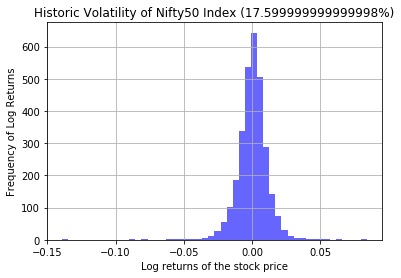

In [26]:
fig,ax = plt.subplots()
data['Log Returns'].hist(ax=ax,bins=50,alpha=0.6,color='b')
ax.set_xlabel('Log returns of the stock price')
ax.set_ylabel('Frequency of Log Returns')
ax.set_title('Historic Volatility of Nifty50 Index ('+ str_vol+'%)')

The volatility says something about how these bins are spread and how close the majority of data is to 0.0.


We are looking at the daily log return here. The higher the daily log return, the more volatile it is. Hence, if we have a log of values that are far from 0.0, then it is volatile. If all values are close to 0.0, it is not as volatile.

The volatility of an investment is a measure of risk.


We now have the tools to evaluate an investment strategy. The return (CAGR), which should be optimized, the maximum drawdown and volatility, which should be minimized.